## Table of Contents
---



---

### TASKS

1. predicting stage (SVM, Decision Trees, novel model)
2. determining if there is a correlation with the disease and any other characstic (SVM, Decision Trees, novel model)
3. determining whether or not there is any genetic ties (neural networks, novel model) (add this in)
4. determine what type of disease is?
5. Target the same dataset as the related works. 

#### Walter
- Neural Networks (parameter tuning + model + stats + feature reduction) EOW5
- statistics/metrics (p-value, t-value, AUC) EOW7

#### Kris
- Decision Trees (parameter tuning + model + stats + feature reduction) EOW5
- discussion EOW7
- conclusion EOW7
- updates to PPT EOW8 (Jamie will help)

#### Thad
- SVM (parameter tuning + model + stats + feature reduction) EOW5
- rewrite of other papers EOW7
- how this affects the community EOW7
- tie back to other papers EOW7

#### Jamie 
- intro EOW4
- ~~explaining data points EOW4~~
- ~~data manipulation (all data related tasks) (reduction method) (reach if needed) EOW3~~
- ~~enhance pre-processing (feature correlations)~~
- visualizations of ML Models (TBD if we have time) very novel EOW
- application build EOW8
- create new ML model EOW5
- ~~just see if we can find antoher dataset: found a separate one, too late for change~~
- ~~create a repo EOW3~~
- ~~one (minimum) paper for baseline (Walter/Thad will find 2-3 each) EOD Thursday~~ 
- feature comparison for Logit & Chi2
- ~~change SMOTE (X_train) & Scaling (X_train & X_Test) after split~~



## Primary Dataset
---
Cross, Simon S. "Dataset of Observed Features on Endoscopic 
Colorectal Biopsies from Normal Subjects and Patients with Chronic 
Inflammatory Bowel Disease (Crohn’s disease and Ulcerative 
Colitis)." Department of Pathology, University of Sheffield Medical 
School (1999): 1-15


Genetics Summary Statistics Dataset: https://www.ibdgenetics.org/downloads.html

East Asian DataSet: https://academic.oup.com/ecco-jcc/article/12/6/730/4951970#116848212

### Libraries
---

In [1]:
# general libraries
import pandas as pd
import numpy as np
from collections import Counter
import itertools
import scipy.stats as stats
import random

In [2]:
# data cleaning libraries
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# ML libraries
from sklearn.model_selection import train_test_split

In [4]:
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## Data
---

In [5]:
# toggle to hide code
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [6]:
# center all images
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### Pull in Data

***ENDSC Data***

In [7]:
# all cases
all_cases = pd.read_excel("../Data/dataset/ENDOSC_1.xls", sheet_name="All cases")
# cleaned cases
cleaned_cases = pd.read_excel("../Data/dataset/ENDOSC_1_2_2.xls", sheet_name="All IBD&normal")
cleaned_cases_og = cleaned_cases
cleaned_cases.head()

,Year,Lab No,Age,Sex,Active inflammation?,Mucosal surface,Crypt architecture,Crypt profiles,Increased lamina propria cellularity?,Mild & superficial increase in lamina propria cellularity?,...,Mucin depletion,Intraepithelial lymphocytes,Subepithelial collagen,Lamina propria granulomas,Submucosal granulomas,Basal histiocytic cells,Confirmed diagnosis,Method of confirmation,Initial pathologists diagnosis,Observing pathologists diagnosis
0,92,5213,20.536986,0,0,0,0,7,0,0,...,0,0,0,0,0,0,UC,Endoscopy,Normal,Normal
1,90,805,55.575342,1,1,1,3,4,1,0,...,1,0,0,0,0,0,UC,Endoscopy,IBD ?UC,Chronic idiopathic IBD - highly suggestive of ...
2,90,5957,58.698630,0,1,1,1,7,1,0,...,0,0,0,0,0,0,UC,Endoscopy,"IBD indeterminate, active",Inflammation - unclassified
3,92,9207,65.934247,0,0,1,1,7,0,0,...,0,0,0,0,0,0,UC,Endoscopy,"Non-specific inflammation, chronic",Chronic idiopathic IBD - indeterminate
4,95,14469,23.391781,0,0,0,0,7,0,0,...,0,0,0,0,0,0,Crohns,Endoscopy,"Non-specific inflammation, chronic",Normal


### Data Definitions


In [8]:
IBD_def = pd.read_excel("../Data/Column_Definitions.xlsx", sheet_name="IBD")

In [9]:
IBD_def[["Data Column", "Definition", "In depth understanding"]]

,Data Column,Definition,In depth understanding
0,Year,Year the biopsy was taken,NaN
1,Lab No,unique laboratory accession number for specifi...,NaN
2,Age,Age of patient,NaN
3,Sex,Sex of patient,NaN
4,Active inflammation?,Boolean,NaN
5,Mucosal surface,is there mucous on the stomach wall?,"flat, irregular, or villous projections\n\nThi..."
6,Crypt architecture,is low stomach present? is there,"prolific by crypt distortion ( branching, Basa..."
7,Crypt profiles,NaN,no definition provided
8,Increased lamina propria cellularity?,Its layers increased inflammation by inflammat...,a thin layer of connective tissue that forms p...
9,Mild & superficial increase in lamina propria ...,NaN,Top layer only of mucus only?


### Data Manipulation

***IBD Stages***: 
Since the stages of UC is determined by the severity of symptoms, the classes are manually added based on symptoms.

Use decision trees to determine 

Perhaps find a doctor who can provide some expertise into the stages? - check if this is possible (we would need multiple people to have statistically significance)

***Data Transformation***
Since the data is already dummy coded, the transformation of it will be required for understanding the outcome after modeling. 

In [10]:
transform_dict = [{"data":["Mucin depletion", "Crypt architecture"], 
                   "definitions":[{
                       0: "Normal",
                       1: "Mild", 
                       2: "Moderate", 
                       3: "Severe"}]},
                  {"data": ["Cryptitis extent", "Crypt abscesses extent"],
                   "definitions": [{
                       0: "None",
                       1: "Little", 
                       2: "Moderate", 
                       3: "Marked"}]},
                  {"data": ["Lamina propria polymorphs"],
                  "definitions": [{
                      0: "Absent", 
                      1: "Focal", 
                      2: "Diffuse"}]},
                  {"data": ["Cryptitis polymorphs", "Crypt abscesses polymorphs"],
                   "definitions": [{
                       0: "None",
                       1: "Few", 
                       2: "Several", 
                       3: "Many"}]},
                  {"data": ["Epithelial changes"], 
                   "definitions": [{
                       0: "Normal",
                       1: "Flattening ",
                       2:  "Degeneration", 
                       3: "Erosion"}]},
                  {"data": ["Mucosal surface"], 
                   "definitions": [{
                       0: "Flat",
                       1: "Irregular", 
                       2: "Villous projections"}]}]

Set Seed for consistency

In [11]:
random.seed(123)

***Crypt architecture*** measures the severity of the deformation of the colon, which will also signify at what severity stage the cases are at. This is the column that will be used for determining cases severities. 

In [12]:
cleaned_cases['Crypt architecture'].unique()

crypt_dict = {0:"normal",
              1:"mild",
              2:"moderate",
              3:"severe"}

cleaned_cases['Severity of Crypt Arch'] = [crypt_dict[x] for x in cleaned_cases['Crypt architecture']]

'Severity of Crypt Arch' + 'diagnoses'

'Severity of Crypt Archdiagnoses'

***convert data to object*** rather than int since these are categorical data.

In [13]:
def change_to_object(df, data_col):
    df[data_col] = df[data_col].astype(object)

run = [change_to_object(cleaned_cases, c) for c in cleaned_cases.columns[3:]]
cleaned_cases['Crypt profiles'] = cleaned_cases['Crypt profiles'].astype('int')
cleaned_cases.dtypes

Year                                                              int64
Lab No                                                            int64
Age                                                             float64
Sex                                                              object
Active inflammation?                                             object
Mucosal surface                                                  object
Crypt architecture                                               object
Crypt profiles                                                    int64
Increased lamina propria cellularity?                            object
Mild & superficial increase in lamina propria cellularity?       object
Increased lymphoid aggregates in lamina propria?                 object
Patchy lamina propria cellularity?                               object
Marked & transmucosal increase in lamina propria cellularity     object
Cryptitis extent                                                

### Data Cleaning

***Clean Diagnosis***:
Strip data and Upper Case and ensure spelling of all are correct to prevent any separation of classes which are unnecessary. 

In [14]:
print(cleaned_cases['Confirmed diagnosis'].unique())
cleaned_cases['Confirmed diagnosis'] = [c.strip().upper() for c in cleaned_cases['Confirmed diagnosis']]
print( cleaned_cases['Confirmed diagnosis'].unique())

['UC' 'Crohns' 'Normal' 'Uc' 'Normal ' 'Crohns ']
['UC' 'CROHNS' 'NORMAL']


In [15]:
cleaned_cases.columns
cleaned_cases["Method of confirmation"] = [x if x != "Endosocpy" else "Endoscopy" for x in cleaned_cases["Method of confirmation"]]
cleaned_cases["Method of confirmation"].unique()

array(['Endoscopy', 'Resection', ' '], dtype=object)

In [16]:
cleaned_cases['Observing pathologists diagnosis'].unique()

array(['Normal',
       'Chronic idiopathic IBD - highly suggestive of ulcerative colitis',
       'Inflammation - unclassified',
       'Chronic idiopathic IBD - indeterminate',
       "Chronic idiopathic IBD - highly suggestive of Crohn's disease",
       "Chronic idiopathic IBD - suggestive of Crohn's disease",
       'Chronic idiopathic IBD - suggestive of ulcerative colitis',
       'Infective type colitis', 'Other colitis Lymphocytic colitis',
       'Other colitis Melanosis coli'], dtype=object)

In [17]:
cleaned_cases['Initial pathologists diagnosis'].unique()
cleaned_cases['Initial pathologists diagnosis'] = [d if d != "IBD ?Crohn's" else "IBD ?Crohns" for d in cleaned_cases['Initial pathologists diagnosis']]
cleaned_cases['Initial pathologists diagnosis'] = [d if d not in ["Non-specific inflammation,chronic", "Non-specific inflammaton, chronic"] else "Non-specific inflammation, chronic" for d in cleaned_cases['Initial pathologists diagnosis']]
cleaned_cases['Initial pathologists diagnosis'].sort_values().unique()

array(['?IBD ?Infective', 'Acute self-limiting colitis', 'Crohns',
       'Diversion colitis', 'IBD ?Crohns', 'IBD ?UC',
       'IBD indeterminate, active', 'IBD indeterminate, quiescent',
       'IBD indeterminate, quiscent', 'Inadequate', 'Melanosis coli',
       'Non-specific inflammation, acute',
       'Non-specific inflammation, chronic', 'Normal',
       'Normal - biopsy artefact', 'Normal - oedema',
       'Normal - spirochaetosis', 'Pouchitis', 'UC'], dtype=object)

In [18]:
cleaned_cases['Year'].sort_values().unique()

array([87, 88, 89, 90, 91, 92, 93, 94, 95, 96])

***Missing/Duplicate Data Checks***

There is no duplicates data

In [19]:
print(f'IBD duplicates: {cleaned_cases.duplicated().any()}')

IBD duplicates: False


There are no missing data values

In [20]:
print(f'IBD missing: {cleaned_cases.isnull().values.any()}')

IBD missing: False


### Train Test Split
Cross and coworkers randomly shuffled the dataset and split the first 540 cases as the train set and the lasts 269 cases as the test set.


In [21]:
X = cleaned_cases.drop('Confirmed diagnosis',axis=1)
y = cleaned_cases['Confirmed diagnosis']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=269, random_state=123)
print(f'Train set has {X_train.shape[0]} rows and test set has {X_test.shape[0]} rows')

Train set has 540 rows and test set has 269 rows


<h2>Class Imbalance</h2>
The minority class of heatlhy was oversampled so that there were equal diseased as unhealthy classes. This is also reflected in graphs below. 

In [22]:
Counter(y_train)

Counter({'UC': 305, 'CROHNS': 117, 'NORMAL': 118})

In [23]:
Counter(cleaned_cases['Initial pathologists diagnosis'])

Counter({'Normal': 195,
         'IBD ?UC': 56,
         'IBD indeterminate, active': 122,
         'Non-specific inflammation, chronic': 39,
         'Crohns': 62,
         'UC': 219,
         'IBD indeterminate, quiescent': 67,
         'IBD ?Crohns': 19,
         'Normal - oedema': 6,
         'Non-specific inflammation, acute': 12,
         'IBD indeterminate, quiscent': 1,
         '?IBD ?Infective': 1,
         'Acute self-limiting colitis': 2,
         'Normal - spirochaetosis': 1,
         'Inadequate': 1,
         'Normal - biopsy artefact': 1,
         'Pouchitis': 1,
         'Melanosis coli': 3,
         'Diversion colitis': 1})

<h3>EDA</h3>

#### Jamie
---

The age is skewed towards the younger generations, and there are outliers of age under 15 and above 85. Since there is no proof that these age groups are errors opposed to only having a low count, they will be left in the data. 

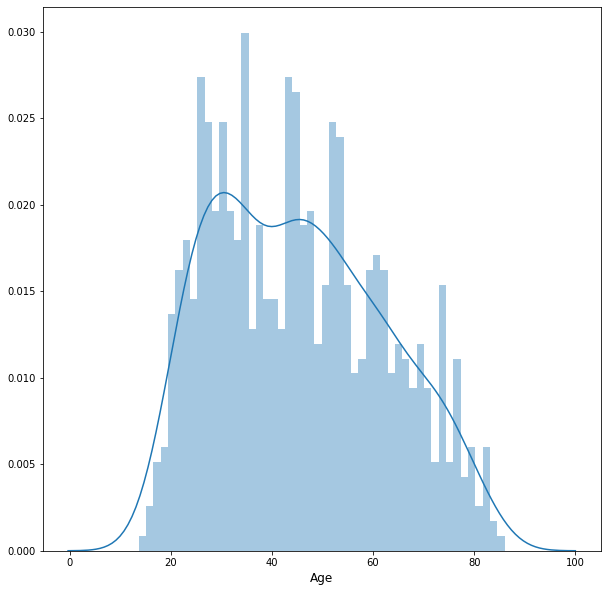

In [24]:
plt.figure(figsize=(10,10))
sns.distplot(cleaned_cases.Age.values, bins=50, kde=True)
plt.xlabel('Age', fontsize=12)
plt.show()

The data below shows that majority of the cases are from years 90-92 and 95-96. The other years have minimal contribution for years prior to year 90. 

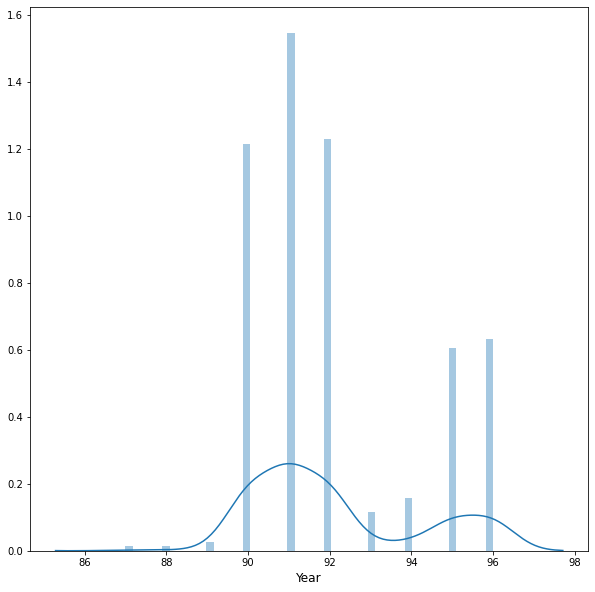

In [25]:
plt.figure(figsize=(10,10))
sns.distplot(cleaned_cases.Year.values, bins=50, kde=True)
plt.xlabel('Year', fontsize=12)
plt.show()

While the data is a mixture of both histology and endoscopy, but majority of the confirmation methods are endoscopy. 

In [26]:
fig = px.histogram(cleaned_cases, x="Age", color='Method of confirmation')
fig.show()

Distribution of the dataset, where majority of the classes are UC and the remaining are split to normal and UC roughly evenly. 

In [27]:
cd_gb = cleaned_cases.groupby("Confirmed diagnosis").count().reset_index()
fig = px.bar(cd_gb, x='Confirmed diagnosis', y='Year')
fig.show()
# cd_gb

In [28]:
fig = px.histogram(cleaned_cases, x="Age", color='Confirmed diagnosis')
fig.show()
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

### correlations

The correlation matrix is show below, which is no the same method which is used for continuous variable, but rather categorical variables. 

In [29]:
corr_matrix = cleaned_cases.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
corr_matrix.head()

,Year,Lab No,Age,Sex,Active inflammation?,Mucosal surface,Crypt architecture,Crypt profiles,Increased lamina propria cellularity?,Mild & superficial increase in lamina propria cellularity?,...,Intraepithelial lymphocytes,Subepithelial collagen,Lamina propria granulomas,Submucosal granulomas,Basal histiocytic cells,Confirmed diagnosis,Method of confirmation,Initial pathologists diagnosis,Observing pathologists diagnosis,Severity of Crypt Arch
Year,1.000000,-0.003860,-0.136752,0.013127,0.030828,0.006227,0.031643,-0.022099,0.042273,-0.041336,...,0.028937,NaN,0.028572,-0.003668,0.042199,-0.009555,0.051771,-0.013499,0.082114,0.031643
Lab No,-0.003860,1.000000,0.664152,-0.054323,0.022624,0.027877,-0.023491,0.030618,0.005793,-0.037130,...,-0.029240,NaN,0.002857,-0.019444,-0.069136,0.007435,0.054606,0.020831,-0.016912,-0.023491
Age,-0.136752,0.664152,1.000000,-0.001607,-0.025780,-0.009704,-0.097190,-0.015083,-0.086089,-0.005274,...,-0.019805,NaN,-0.036528,-0.045555,-0.063514,0.040530,0.070234,0.039240,-0.110549,-0.097190
Sex,0.013127,-0.054323,-0.001607,1.000000,-0.064066,-0.122315,-0.097119,-0.056975,-0.084777,-0.014896,...,0.023621,NaN,-0.005535,0.000962,-0.052319,0.142636,-0.032284,-0.071933,-0.057528,-0.097119
Active inflammation?,0.030828,0.022624,-0.025780,-0.064066,1.000000,0.369577,0.494637,0.210146,0.742688,0.085048,...,-0.013979,NaN,0.124816,0.035432,0.144034,-0.422155,0.155847,0.223316,0.434342,0.494637


We see strong correlations between the symptoms. Specifically, there is a strong correlation between active inflammation and lamina propria polymorphs, which is investigated further below. 

Many of the correlations are intuitively connected. For example, cryptis polymorphs and extent, since they are both related to the the fact of where there is inflammation in the linings of the stomach to the morphed cells of the glands. 

One interesting obervation is the correlation of epithelial changes and the mucin depletions since the epithelial layer concerns the outter layer of the intestine and the mucin depletion primarily concerns with the inner side of the organ. 

In [30]:
fig = px.imshow(corr_matrix)
fig.update_yaxes(visible=False, showticklabels=False)
fig.update_xaxes(visible=False, showticklabels=False)
fig.show()

***Active inflammation and lamina propria polymorphs***

Overall, the active inflamation makes sense considering if there is no inflammation, that there in turn would have no polymorphs. Since the inner linings are typically only shows to morph when there is inflammation, this is intuitive in the results. 

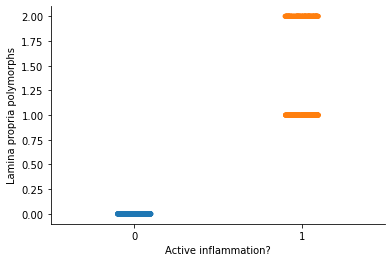

In [31]:
sns.stripplot(x='Active inflammation?', y='Lamina propria polymorphs', data=cleaned_cases, jitter=True)
sns.despine()

CPU times: user 1min 12s, sys: 1.61 s, total: 1min 13s
Wall time: 1min 27s


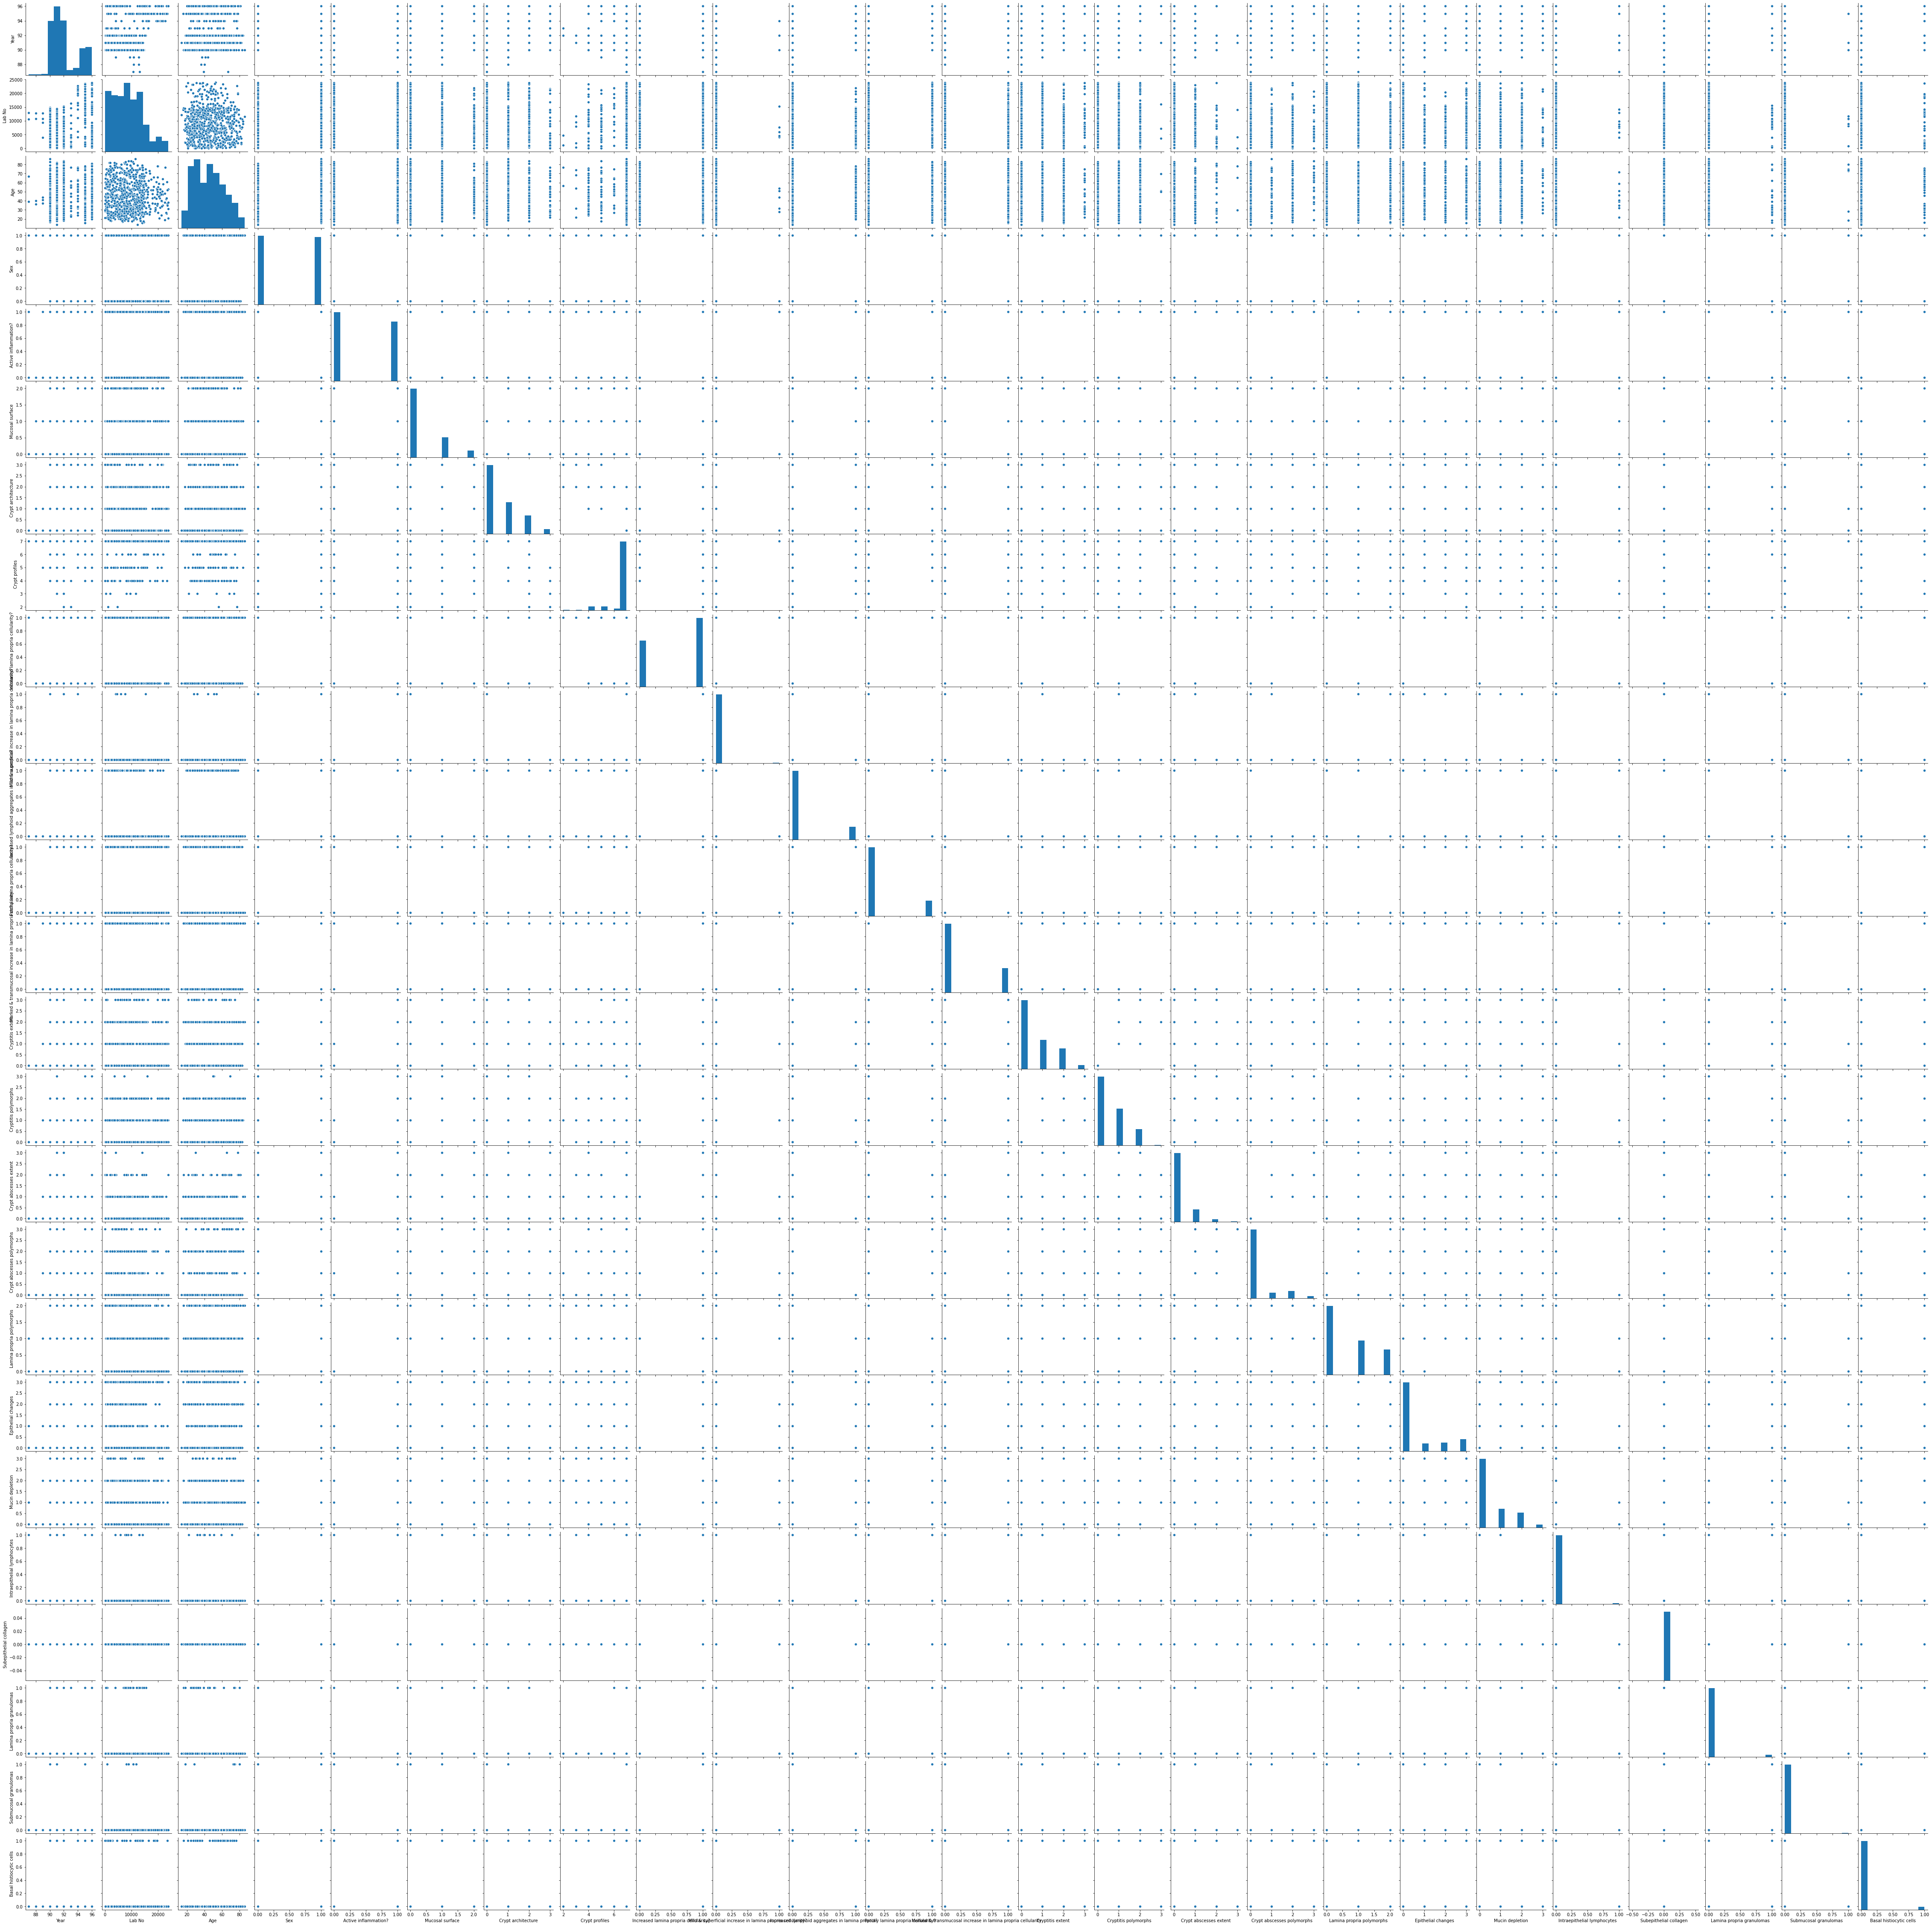

In [32]:
%%time
sns.pairplot(cleaned_cases)

#### Odds Ratio

Odds ratio is a measure of association between an exposure and an outcome. The OR represents the odds that an outcome will occur given a particular exposure, compared to the odds of the outcome occurring in the absence of that exposure. [source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2938757/)

There is no strong correlations between the two, that if a patient is of a specified year and age, there is a 1:1 ratio of the patient being diagnosed with UC of chrohns. 

In [33]:
# odds ratio calc
uc_ch = cleaned_cases.loc[cleaned_cases["Confirmed diagnosis"].isin(['UC', 'CROHNS'])]
table_uc = uc_ch[["Confirmed diagnosis", "Year", "Age"]].groupby("Confirmed diagnosis").sum()#.values
print(table_uc)
oddsratio_uc, pvalue_uc = stats.fisher_exact(table_uc)
print("OddsR: ", round(oddsratio_uc,4), "p-Value:", pvalue_uc)

                      Year           Age
Confirmed diagnosis                     
CROHNS               15735   7288.413699
UC                   43525  22326.134247
OddsR:  1.1075 p-Value: 4.212365775994321e-10


*** Reducing categorical classes***
Since there isn't a high number of classes in each categorical columns, there is no need to reduce the number of classes in a categorical set. 

#### Walter
---
Each column in the dataset is a symptom.  SOme of the symptoms are rankings.  When the column for Subepithelial collagen is 1 it means that the patient had that symptom and when it is 0 it means the patient did not have that symptom.  

In [34]:
train = pd.concat([X_train,y_train],axis=1)

<h3>Supervised Learning</h3>

Get only the binary variables

In [35]:
binary_vars = X_train.columns[X_train.apply(lambda series: False if set(series)-{0,1} else True)]
binary_vars = list(set(binary_vars) - set(['Active inflammation?']))
# binary_vars

Calculate the relative risk ratio of having IBD if patient has or doesnt have Patchy lamina propria cellularity

In [36]:
patchyVsIbd   = train.groupby(['Patchy lamina propria cellularity?','Confirmed diagnosis']).size()
patchySummary = X_train.groupby('Patchy lamina propria cellularity?').size()
print(patchyVsIbd)
print(patchySummary)

Patchy lamina propria cellularity?  Confirmed diagnosis
0                                   CROHNS                  82
                                    NORMAL                 114
                                    UC                     257
1                                   CROHNS                  35
                                    NORMAL                   4
                                    UC                      48
dtype: int64
Patchy lamina propria cellularity?
0    453
1     87
dtype: int64


What proportion of those with patchy lamina propria had Crohn's Disease?

In [37]:
proportions = patchyVsIbd/patchySummary
proportions

Patchy lamina propria cellularity?  Confirmed diagnosis
0                                   CROHNS                 0.181015
                                    NORMAL                 0.251656
                                    UC                     0.567329
1                                   CROHNS                 0.402299
                                    NORMAL                 0.045977
                                    UC                     0.551724
dtype: float64

How much more chance of getting Crohn's disease if you have patchy lamina propria cellularity VS if you dont have patch lamina prpria cellularity?

In [38]:
proportions.loc[1]/proportions.loc[0]

Confirmed diagnosis
CROHNS    2.222456
NORMAL    0.182698
UC        0.972494
dtype: float64

Observe above that the probabilit of getting Crohn's is twice as much if you have patchy lamina propria cellularity VS if you dont have patchy lamina.

Determine relative risk of Crohn's or UC for all the symptoms<br>
Calculation will require creating 3 tables:
<ol>
    <li>Symptom, Is Symptom Present, Confirmed Diagnosis, Count</li>
    <li>Symptom, Is Symptom Present, Count</li>
    <li>Symptom, Is Symptom Present, Confirmed Diagnosis, Proportion</li>
    <li>Symptom, Confirmed Diagnosis, Relative Risk (Final Table)</li>
</ol>

In [39]:
#1.Symptom, Is Symptom Present, Confirmed Diagnosis, Count
#Column, Value, Value for Diagnosis Column
binaryTrain = train[binary_vars+['Confirmed diagnosis']]
symptomDiagnosis = binaryTrain.reset_index().melt(id_vars=['index','Confirmed diagnosis'])
#Column, Value, Value for Diagnosis Column, Count
diseaseCountPerSymptom = symptomDiagnosis.groupby(['variable','value','Confirmed diagnosis']).size()
diseaseCountPerSymptom.head()

variable                 value  Confirmed diagnosis
Basal histiocytic cells  0      CROHNS                 113
                                NORMAL                 117
                                UC                     291
                         1      CROHNS                   4
                                NORMAL                   1
dtype: int64

In [40]:
#2.Symptom, Is Symptom Present, Count
countPerSymptom = symptomDiagnosis.groupby(['variable','value']).size()
countPerSymptom.head()

variable                                          value
Basal histiocytic cells                           0        521
                                                  1         19
Increased lamina propria cellularity?             0        216
                                                  1        324
Increased lymphoid aggregates in lamina propria?  0        453
dtype: int64

In [41]:
#3. Symptom, Is Symptom Present, Confirmed Diagnosis, Proportion
proportionIbdPerSymptom = diseaseCountPerSymptom/countPerSymptom
proportionIbdPerSymptom.head()

variable                 value  Confirmed diagnosis
Basal histiocytic cells  0      CROHNS                 0.216891
                                NORMAL                 0.224568
                                UC                     0.558541
                         1      CROHNS                 0.210526
                                NORMAL                 0.052632
dtype: float64

In [42]:
#4.Symptom, Confirmed Diagnosis, Relative Risk (Final Table)
propDf = proportionIbdPerSymptom.reset_index()
noSymptom  = propDf.loc[propDf['value']==0].drop('value',axis=1).set_index(['variable','Confirmed diagnosis'])
yesSymptom = propDf.loc[propDf['value']==1].drop('value',axis=1).set_index(['variable','Confirmed diagnosis'])

'''
Some symptoms such as Submucosal granulomas are only present in Crohn's pateints. this means there is no 
patient who has both submucosal granuloma and UC.  So the risk of having UC given u have submcuoal granulomas
is 0.  But currently in the yesSymptom df, the row Submucosal granulom and UC does not even exist.  So if that row 
is missing just add a row with 0
'''  
noSymptom = noSymptom.reset_index()
varDxCombos= list(itertools.product(set(noSymptom['variable']),set(noSymptom['Confirmed diagnosis'])))
allCombos  = pd.DataFrame(index=pd.MultiIndex.from_tuples(varDxCombos)) 
allCombos.index.names = ['variable','Confirmed diagnosis']
noSymptom  = noSymptom.set_index(['variable','Confirmed diagnosis'])
yesSymptom = pd.merge(yesSymptom, allCombos, left_index=True, right_index=True, how='outer').fillna({0:0})
yesSymptom.head()

0
variable                              Confirmed diagnosis          
Basal histiocytic cells               CROHNS               0.210526
                                      NORMAL               0.052632
                                      UC                   0.736842
Increased lamina propria cellularity? CROHNS               0.225309
                                      NORMAL               0.046296

Out of all the people that had Increased lamina propria cellularity, what percent of them had Crohn's disase?<br>
In below table see that 22.5% of patients with Increased lamina propria cellularity had Crohn's disease.

Out of all the people that did NOT have Increase lamina propria cellularity, how many had Crohn's disease?

In [43]:
noSymptom = pd.merge(noSymptom, allCombos, left_index=True, right_index=True, how='outer').fillna({0:0})
noSymptom.head()

0
variable                              Confirmed diagnosis          
Basal histiocytic cells               CROHNS               0.216891
                                      NORMAL               0.224568
                                      UC                   0.558541
Increased lamina propria cellularity? CROHNS               0.203704
                                      NORMAL               0.476852

You have two people, one with increased lamina propria cellularity and the other one without increased lamina propria cellularity.  How much more likely is the first person to have Crohn's disease compared to the second?

You have two people, one with increased lamina propria cellularity and the other one without increased lamina propria cellularity.  How much more likely is the first person to have Crohn's disease compared to the second?

In [44]:
relativeRiskIbd = (yesSymptom/noSymptom).reset_index()
relativeRiskIbd.head()

,variable,Confirmed diagnosis,0
0,Basal histiocytic cells,CROHNS,0.970657
1,Basal histiocytic cells,NORMAL,0.234368
2,Basal histiocytic cells,UC,1.319226
3,Increased lamina propria cellularity?,CROHNS,1.106061
4,Increased lamina propria cellularity?,NORMAL,0.097087


[Text(0.5, 1.0, 'Normal')]

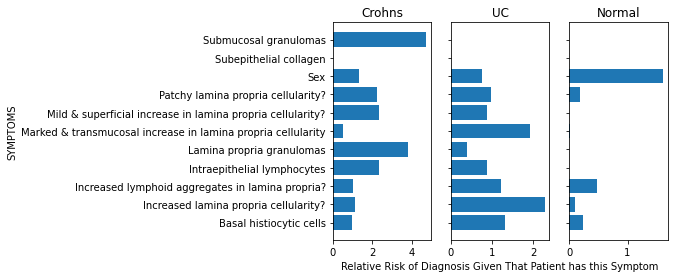

In [45]:
fig,ax = plt.subplots(nrows=1,ncols=3, sharey=True)
crohns = relativeRiskIbd[relativeRiskIbd['Confirmed diagnosis']=='CROHNS']
uc     = relativeRiskIbd[relativeRiskIbd['Confirmed diagnosis']=='UC']
normal = relativeRiskIbd[relativeRiskIbd['Confirmed diagnosis']=='NORMAL']
ax[0].barh(crohns['variable'],crohns[0])
ax[0].set(title='Crohns',
         ylabel='SYMPTOMS')
ax[1].barh(uc['variable'],uc[0])
ax[1].set(title='UC',xlabel='Relative Risk of Diagnosis Given That Patient has this Symptom',)
ax[2].barh(normal['variable'],normal[0])
ax[2].set(title='Normal')

For unsupervised EDA, The objective is to find multiple symptoms that are all 1 for the same patients and are all 0 for other patients.  

<ol>
    <li>First, manually calculate the risk ratio between Symptom A and Symptom B</li>
    <li>Next, create a cross tab where the row is Symptom A, the column is Symptom B and the cell value is the risk ratio of Symptom B / Symptom A</li>
    <li>Finally, find the groups of symptoms that have highest risk ratios for one another.  If 3 columns have high relative risk ratios, consider keeping only one of those columns and dropping the other 2</li>
</ol>

<h4>Risk Ratio</h4>
What is the risk of getting "Increased lamina propria cellularity" if you do have "Lamina propria granulomas" versus the risk of getting "Increased lamina propria cellularity" if you do not have "Lamina propria granulomas"?<br><br>

If two symptoms are both positive in 1000 patients.  And in another 1000 patients the two symptoms are negative.  This would indicate correlation between those 2 symptoms.

In [46]:
exposure = 'Lamina propria granulomas'
disease  = 'Increased lamina propria cellularity?'
risks = X_train.groupby([exposure,disease]
               ).size()/X_train.groupby([exposure]).size()
risks = risks.reset_index()
riskGivenNoExposure = risks.loc[(risks[exposure] == 0)&
                              (risks[disease] == 1),0].values[0]
riskGivenExposure   = risks.loc[(risks[exposure] == 1)&
                              (risks[disease] == 1),0].values[0]
riskGivenExposure/riskGivenNoExposure

1.5591715976331362

Get the cross tab of every symptom with every other symptom

In [47]:
def multicolumn_crosstab(df,cols):
    cols=sorted(cols)
    dummies = pd.get_dummies(df[cols])
    dfWithDummies = pd.concat([df,dummies],axis=1)
    dfWithDummies = dfWithDummies.reset_index()
    dfMelt = dfWithDummies.melt(id_vars=np.concatenate([np.array(['index']),dummies.columns.values]),
                      value_vars=cols)
    dfMelt = dfMelt.drop('index',axis=1)
    levelGroup = dfMelt.groupby(['variable','value'])
    crosstab = levelGroup.sum()
    countPerLevel = levelGroup.size()
    crossTabProp = crosstab.divide(countPerLevel,axis=0)
    return crossTabProp

In [48]:
ct = multicolumn_crosstab(X_train.astype(str),binary_vars)

In the below cross tab, the value in the second row, and in the fourth column (Incerased Lamina propria cellularity_1) is the number 0.894737.  This means that 89% of the patients (in the train set) had both Basal histocytic cells and Increased lamina propria cellularity.  Notice how this number 89% adds up tihe the 10.5263 % on the left of it.  That 10% number is the proportion of patients that had basal histocytic cells but did NOT have icnreased lamina propria cellularity.

In [49]:
ct.head()

Basal histiocytic cells_0  \
variable                                         value                              
Basal histiocytic cells                          0                       1.000000   
                                                 1                       0.000000   
Increased lamina propria cellularity?            0                       0.990741   
                                                 1                       0.947531   
Increased lymphoid aggregates in lamina propria? 0                       0.964680   

                                                        Basal histiocytic cells_1  \
variable                                         value                              
Basal histiocytic cells                          0                       0.000000   
                                                 1                       1.000000   
Increased lamina propria cellularity?            0                       0.009259   
                                                 1                       0.052469   
Increased lymphoid aggregates in lamina propria? 0                       0.035320   

                                                        Increased lamina propria cellularity?_0  \
variable                                         value                                            
Basal histiocytic cells                          0                                     0.410749   
                                                 1                                     0.105263   
Increased lamina propria cellularity?            0                                     1.000000   
                                                 1                                     0.000000   
Increased lymphoid aggregates in lamina propria? 0                                     0.476821   

                                                        Increased lamina propria cellularity?_1  \
variable                                         value                                            
Basal histiocytic cells                          0                                     0.589251   
                                                 1                                     0.894737   
Increased lamina propria cellularity?            0                                     0.000000   
                                                 1                                     1.000000   
Increased lymphoid aggregates in lamina propria? 0                                     0.523179   

                                                        Increased lymphoid aggregates in lamina propria?_0  \
variable                                         value                                                       
Basal histiocytic cells                          0                                               0.838772    
                                                 1                                               0.842105    
Increased lamina propria cellularity?            0                                               1.000000    
                                                 1                                               0.731481    
Increased lymphoid aggregates in lamina propria? 0                                               1.000000    

                                                        Increased lymphoid aggregates in lamina propria?_1  \
variable                                         value                                                       
Basal histiocytic cells                          0                                               0.161228    
                                                 1                                               0.157895    
Increased lamina propria cellularity?            0                                               0.000000    
                                                 1                                               0.268519    
Increased lymphoid aggregates in lamina propr

Which feature is most correlated with the other features? <br><br>
Observe that "Increased lamina propria cellularity" and "Active Inflammation" are the columns that is most correlated with the other symptoms.

noExposureDf: Get all the risks of getting Symptom B given that you dont have symptom A.<br>
exposureDf:   Get all the risks of getting Symptom B given that you do have symptom A.

In [50]:
crossTab     = ct.reset_index()
noExposureDf = crossTab.loc[crossTab['value']=='0']
exposureDf   = crossTab.loc[crossTab['value']=='1']

Divide all the risk-given-exposure/ risk-given-no-exposure to get the relative risk for every symptom pair

In [51]:
noExposureDf = noExposureDf.set_index('variable').drop('value',axis=1)
exposureDf   = exposureDf.set_index('variable').drop('value',axis=1)
relativeRisks= exposureDf/noExposureDf
relativeRisks.head()

,Basal histiocytic cells_0,Basal histiocytic cells_1,Increased lamina propria cellularity?_0,Increased lamina propria cellularity?_1,Increased lymphoid aggregates in lamina propria?_0,Increased lymphoid aggregates in lamina propria?_1,Intraepithelial lymphocytes_0,Intraepithelial lymphocytes_1,Lamina propria granulomas_0,Lamina propria granulomas_1,...,Marked & transmucosal increase in lamina propria cellularity_1,Mild & superficial increase in lamina propria cellularity?_0,Mild & superficial increase in lamina propria cellularity?_1,Patchy lamina propria cellularity?_0,Patchy lamina propria cellularity?_1,Sex_0,Sex_1,Subepithelial collagen_0,Submucosal granulomas_0,Submucosal granulomas_1
variable,,,,,,,,,,,,,,,,,,,,,
Basal histiocytic cells,0.000000,inf,0.256272,1.518430,1.003974,0.979323,1.011650,0.000000,0.969703,2.285088,...,1.544848,1.003854,0.0,0.810167,2.031189,1.345184,0.642681,1.0,1.007737,0.000000
Increased lamina propria cellularity?,0.956386,5.666667,0.000000,inf,0.731481,inf,0.989147,3.333333,0.967442,8.000000,...,inf,0.993827,inf,0.731481,inf,1.186667,0.839080,1.0,0.987654,inf
Increased lymphoid aggregates in lamina propria?,1.000868,0.976293,0.000000,1.911392,0.000000,inf,0.999538,1.041379,1.029545,0.000000,...,0.000000,1.004435,0.0,1.202680,0.122515,1.059412,0.938180,1.0,1.008909,0.000000
Intraepithelial lymphocytes,1.036893,0.000000,0.413953,1.394984,0.993304,1.034884,0.000000,inf,0.852490,7.416667,...,1.202703,1.003759,0.0,0.792873,2.094118,0.644928,1.379845,1.0,1.007547,0.000000
Lamina propria granulomas,0.955720,2.252137,0.188551,1.559172,1.197727,0.000000,0.931919,8.107692,0.000000,inf,...,0.000000,1.003810,0.0,0.089687,6.486154,1.356305,0.628503,1.0,0.770693,121.615385


The relative risk from our risk matrix is the same as the one when we manually calculated it. 1.559171

In [52]:
relativeRisks.loc['Lamina propria granulomas','Increased lamina propria cellularity?_1' ]

1.5591715976331362

Replace infinity values or abnormally high Relative risks with 0

In [53]:
relativeRisks = relativeRisks.applymap(lambda cell:0 if cell>20 else cell)

Observe in heatmap below that Submucosal granulomas are highly correlated with lamina propria granulomas

<AxesSubplot:ylabel='variable'>

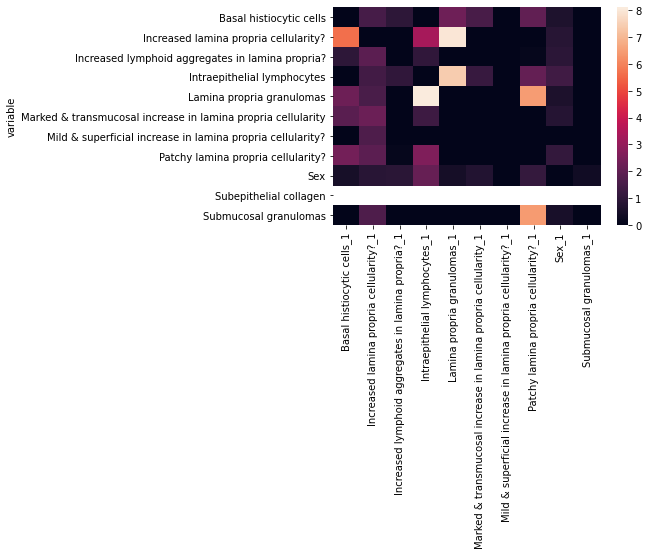

In [54]:
symptomPresent = [column for column in ct.columns if '1' in column]
sns.heatmap(relativeRisks[symptomPresent])

Out of the 453 patients that did not have patchy lamina propria cellularity none of those patients also had lamina propria granulomas.<br>
However, out of the 87 patients that had patchy laminap propria cellularity, 4 of those patients also had lamina propria granulomas.<br>
It looks like these 2 columns are correlated.

In [55]:
X_train.groupby(['Patchy lamina propria cellularity?','Submucosal granulomas']).size()

Patchy lamina propria cellularity?  Submucosal granulomas
0                                   0                        453
1                                   0                         83
                                    1                          4
dtype: int64

Out of the 453 patients that did not have patchy lamina propria cellularity only 1 of those patients also had lamina propria granulomas.<br>
However, out of the 87 patients that had patchy laminap propria cellularity, 12 of those patients also had lamina propria granulomas.<br>
It looks like these 2 columns are correlated.

In [56]:
X_train.groupby(['Patchy lamina propria cellularity?','Lamina propria granulomas']).size()

Patchy lamina propria cellularity?  Lamina propria granulomas
0                                   0                            452
                                    1                              1
1                                   0                             75
                                    1                             12
dtype: int64

You have two people, one with increased lamina propria cellularity and the other one without increased lamina propria cellularity.  How much more likely is the first person to have Crohn's disease compared to the second?

In [57]:
train.groupby(['Submucosal granulomas','Confirmed diagnosis']).size()

Submucosal granulomas  Confirmed diagnosis
0                      CROHNS                 113
                       NORMAL                 118
                       UC                     305
1                      CROHNS                   4
dtype: int64

### Model Assumptions

The model assumptions for all models are not concerning to the data for visualization. The main requirement is that the data doesn't have a linear correlation between features and that the data is independent, assumed by the unique data points. 

Due to the data primarily being categorical, the modifications/assumptions are difficult to decipher. 

### Data Prep for Modeling

***Dummy coding the Data***

There are two different set methods, dummy coding and ordinal. Before converting to dummy code, the data is first returned to it original form, then dummy coded to understand the effects of feature reduction and whether its required. 

In [58]:
# convert it back to the original setup
df_reset = cleaned_cases.copy()
df_reset_od = cleaned_cases.copy()
df_reset.head()

,Year,Lab No,Age,Sex,Active inflammation?,Mucosal surface,Crypt architecture,Crypt profiles,Increased lamina propria cellularity?,Mild & superficial increase in lamina propria cellularity?,...,Intraepithelial lymphocytes,Subepithelial collagen,Lamina propria granulomas,Submucosal granulomas,Basal histiocytic cells,Confirmed diagnosis,Method of confirmation,Initial pathologists diagnosis,Observing pathologists diagnosis,Severity of Crypt Arch
0,92,5213,20.536986,0,0,0,0,7,0,0,...,0,0,0,0,0,UC,Endoscopy,Normal,Normal,normal
1,90,805,55.575342,1,1,1,3,4,1,0,...,0,0,0,0,0,UC,Endoscopy,IBD ?UC,Chronic idiopathic IBD - highly suggestive of ...,severe
2,90,5957,58.698630,0,1,1,1,7,1,0,...,0,0,0,0,0,UC,Endoscopy,"IBD indeterminate, active",Inflammation - unclassified,mild
3,92,9207,65.934247,0,0,1,1,7,0,0,...,0,0,0,0,0,UC,Endoscopy,"Non-specific inflammation, chronic",Chronic idiopathic IBD - indeterminate,mild
4,95,14469,23.391781,0,0,0,0,7,0,0,...,0,0,0,0,0,CROHNS,Endoscopy,"Non-specific inflammation, chronic",Normal,normal


In [59]:
transform_dict

[{'data': ['Mucin depletion', 'Crypt architecture'],
  'definitions': [{0: 'Normal', 1: 'Mild', 2: 'Moderate', 3: 'Severe'}]},
 {'data': ['Cryptitis extent', 'Crypt abscesses extent'],
  'definitions': [{0: 'None', 1: 'Little', 2: 'Moderate', 3: 'Marked'}]},
 {'data': ['Lamina propria polymorphs'],
  'definitions': [{0: 'Absent', 1: 'Focal', 2: 'Diffuse'}]},
 {'data': ['Cryptitis polymorphs', 'Crypt abscesses polymorphs'],
  'definitions': [{0: 'None', 1: 'Few', 2: 'Several', 3: 'Many'}]},
 {'data': ['Epithelial changes'],
  'definitions': [{0: 'Normal',
    1: 'Flattening ',
    2: 'Degeneration',
    3: 'Erosion'}]},
 {'data': ['Mucosal surface'],
  'definitions': [{0: 'Flat', 1: 'Irregular', 2: 'Villous projections'}]}]

In [60]:
for val in transform_dict:
    print("============new dictionary===========")
    cols = val['data']
    print(val['definitions'])
    for col in cols:
        try:
            df_reset[col] = [val['definitions'][0][v] for v in df_reset[col]]
        except:
            pass

============new dictionary===========
[{0: 'Normal', 1: 'Mild', 2: 'Moderate', 3: 'Severe'}]
============new dictionary===========
[{0: 'None', 1: 'Little', 2: 'Moderate', 3: 'Marked'}]
============new dictionary===========
[{0: 'Absent', 1: 'Focal', 2: 'Diffuse'}]
============new dictionary===========
[{0: 'None', 1: 'Few', 2: 'Several', 3: 'Many'}]
============new dictionary===========
[{0: 'Normal', 1: 'Flattening ', 2: 'Degeneration', 3: 'Erosion'}]
============new dictionary===========
[{0: 'Flat', 1: 'Irregular', 2: 'Villous projections'}]


In [61]:
# review the data transformation
df_reset[["Cryptitis extent","Cryptitis polymorphs","Crypt abscesses extent","Crypt abscesses polymorphs","Lamina propria polymorphs","Epithelial changes","Mucin depletion"]]

# get dummies
dummied = pd.get_dummies(df_reset[["Cryptitis extent","Cryptitis polymorphs","Crypt abscesses extent","Crypt abscesses polymorphs","Lamina propria polymorphs","Epithelial changes","Mucin depletion","Method of confirmation","Initial pathologists diagnosis","Observing pathologists diagnosis", "Severity of Crypt Arch"]])
df_dummy = pd.merge(dummied, cleaned_cases.drop(["Cryptitis extent","Cryptitis polymorphs","Crypt abscesses extent","Crypt abscesses polymorphs","Lamina propria polymorphs","Epithelial changes","Mucin depletion","Method of confirmation","Initial pathologists diagnosis","Observing pathologists diagnosis", "Severity of Crypt Arch"], axis=1), how = "inner", left_index=True, right_index=True)


for column "Initial pathologists diagnosis_?IBD ?Infective", there is only one instance of this observation. Due to this we will drop the column as it will error during analysis. 

In [62]:
df_dummy = df_dummy.drop(["Initial pathologists diagnosis_?IBD ?Infective","Initial pathologists diagnosis_Pouchitis", "Initial pathologists diagnosis_Diversion colitis", "Initial pathologists diagnosis_IBD indeterminate, quiscent"] ,axis=1)

In [63]:
df_type = pd.DataFrame(df_dummy.dtypes)

for x in df_type.loc[df_type[0] == "uint8"].reset_index()['index']:
    df_dummy[x] = df_dummy[x].astype('object')

df_dummy.dtypes

Cryptitis extent_Little      object
Cryptitis extent_Marked      object
Cryptitis extent_Moderate    object
Cryptitis extent_None        object
Cryptitis polymorphs_Few     object
                              ...  
Subepithelial collagen       object
Lamina propria granulomas    object
Submucosal granulomas        object
Basal histiocytic cells      object
Confirmed diagnosis          object
Length: 78, dtype: object

***Ordinal Data***

Ordinal data is the method of which the data is already set up in. This allows the researchers to put the remaining data types into an ordinal set up for analysis. 

In [64]:
ord_cols = ["Method of confirmation","Initial pathologists diagnosis","Observing pathologists diagnosis","Severity of Crypt Arch"]

In [65]:
for val in ord_cols:
    print(val)
    array_un = df_reset_od[val].unique().tolist()
    df_reset_od[val] = df_reset_od[val].apply(lambda x: array_un.index(x))

Method of confirmation
Initial pathologists diagnosis
Observing pathologists diagnosis
Severity of Crypt Arch


In [66]:
df_ordinal = df_reset_od
df_ordinal.head()

,Year,Lab No,Age,Sex,Active inflammation?,Mucosal surface,Crypt architecture,Crypt profiles,Increased lamina propria cellularity?,Mild & superficial increase in lamina propria cellularity?,...,Intraepithelial lymphocytes,Subepithelial collagen,Lamina propria granulomas,Submucosal granulomas,Basal histiocytic cells,Confirmed diagnosis,Method of confirmation,Initial pathologists diagnosis,Observing pathologists diagnosis,Severity of Crypt Arch
0,92,5213,20.536986,0,0,0,0,7,0,0,...,0,0,0,0,0,UC,0,0,0,0
1,90,805,55.575342,1,1,1,3,4,1,0,...,0,0,0,0,0,UC,0,1,1,1
2,90,5957,58.698630,0,1,1,1,7,1,0,...,0,0,0,0,0,UC,0,2,2,2
3,92,9207,65.934247,0,0,1,1,7,0,0,...,0,0,0,0,0,UC,0,3,3,2
4,95,14469,23.391781,0,0,0,0,7,0,0,...,0,0,0,0,0,CROHNS,0,3,0,0


Of the two differing methods, one of the two will be selected for analysis. 

### Train/Test Split

In [67]:
X_ord = df_ordinal.drop("Confirmed diagnosis", axis=1)
y_ord = df_ordinal['Confirmed diagnosis']

X_train_ord , X_test_ord, y_train_ord, y_test_ord = train_test_split(X_ord, y_ord, test_size=0.25, random_state=42)

In [68]:
X_train_ord[X_train_ord.isna().any(axis=1)]

,Year,Lab No,Age,Sex,Active inflammation?,Mucosal surface,Crypt architecture,Crypt profiles,Increased lamina propria cellularity?,Mild & superficial increase in lamina propria cellularity?,...,Mucin depletion,Intraepithelial lymphocytes,Subepithelial collagen,Lamina propria granulomas,Submucosal granulomas,Basal histiocytic cells,Method of confirmation,Initial pathologists diagnosis,Observing pathologists diagnosis,Severity of Crypt Arch


***Max-Min Transformation***

In [69]:
df_ord_scale = df_reset_od.drop("Confirmed diagnosis", 1)
X_train_ord = X_train_ord.copy().reset_index().drop('index',axis=1)
X_test_ord = X_test_ord.copy().reset_index().drop('index',axis=1)
for val in X_train_ord.columns:
    X_train_ord[val] = X_train_ord[val].astype(int)
    X_test_ord[val] = X_test_ord[val].astype(int)

In [70]:
from sklearn.preprocessing import MinMaxScaler

# Scale only columns that have values greater than 1
to_scale = [col for col in X_train_ord.columns if X_train_ord[col].max() > 1]
mms = MinMaxScaler()
scaled = mms.fit_transform(X_train_ord[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)
scaled_test = mms.fit_transform(X_test_ord[to_scale])
scaled_test = pd.DataFrame(scaled_test, columns=to_scale)

# Replace original columns with scaled ones
for col in scaled:
    X_train_ord[col] = scaled[col]
    X_test_ord[col] = scaled_test[col]
    
# df_ord_scale = X_train_ord.merge(df_reset_od["Confirmed diagnosis"], how="inner", left_index=True, right_index=True)

In [71]:
# X_train_ord = X_train_ord.merge(df_reset_od["Confirmed diagnosis"], how="inner", left_index=True, right_index=True)
X_train_ord[X_train_ord.isna().any(axis=1)]

,Year,Lab No,Age,Sex,Active inflammation?,Mucosal surface,Crypt architecture,Crypt profiles,Increased lamina propria cellularity?,Mild & superficial increase in lamina propria cellularity?,...,Mucin depletion,Intraepithelial lymphocytes,Subepithelial collagen,Lamina propria granulomas,Submucosal granulomas,Basal histiocytic cells,Method of confirmation,Initial pathologists diagnosis,Observing pathologists diagnosis,Severity of Crypt Arch


In [72]:
X_test_ord[X_test_ord.isna().any(axis=1)]

,Year,Lab No,Age,Sex,Active inflammation?,Mucosal surface,Crypt architecture,Crypt profiles,Increased lamina propria cellularity?,Mild & superficial increase in lamina propria cellularity?,...,Mucin depletion,Intraepithelial lymphocytes,Subepithelial collagen,Lamina propria granulomas,Submucosal granulomas,Basal histiocytic cells,Method of confirmation,Initial pathologists diagnosis,Observing pathologists diagnosis,Severity of Crypt Arch


***SMOTE***

In [73]:
from imblearn.over_sampling import SMOTE 

In [74]:
sm = SMOTE(random_state=123)

In [75]:
X_sm, y_sm = sm.fit_resample(X_train_ord, y_train_ord)

print(f'''Shape of X before SMOTE: {X_ord.shape}
Shape of X after SMOTE: {X_sm.shape}''')

Shape of X before SMOTE: (809, 29)
Shape of X after SMOTE: (1044, 29)


In [76]:
print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100


Balance of positive and negative classes (%):


CROHNS    33.333333
UC        33.333333
NORMAL    33.333333
Name: Confirmed diagnosis, dtype: float64

In [77]:
# Final Sets
data = [X_sm, X_test_ord, y_sm, y_test_ord]

### Feature Importance

Chi-squared is used for determining feature importance. [source](https://machinelearningmastery.com/feature-selection-with-categorical-data/)

In [78]:
# y = cleaned_cases['Confirmed diagnosis']
# X = cleaned_cases.drop(['Confirmed diagnosis','Initial pathologists diagnosis', 'Observing pathologists diagnosis', "Year","Lab No","Age"], axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# print('Train', X_train.shape, y_train.shape)
# print('Test', X_test.shape, y_test.shape)

In [79]:
# # prepare input data
# def prepare_inputs(X_train, X_test):
#     oe = OrdinalEncoder()
#     oe.fit(X_train)
#     X_train_enc = oe.transform(X_train)
#     X_test_enc = oe.transform(X_test)
#     return X_train_enc, X_test_enc

# def prepare_targets(y_train, y_test):
#     le = LabelEncoder()
#     le.fit(y_train)
#     y_train_enc = le.transform(y_train)
#     y_test_enc = le.transform(y_test)
#     return y_train_enc, y_test_enc

# # feature selection
# def select_features(X_train, y_train, X_test):
#     fs = SelectKBest(score_func="mutual_info_classif", k=4)
#     fs.fit(X_train, y_train)
#     X_train_fs = fs.transform(X_train)
#     X_test_fs = fs.transform(X_test)
#     return X_train_fs, X_test_fs

In [80]:
# oe = OrdinalEncoder()
# oe.fit(X_train)
# oe.categories_
# X_train_enc = oe.transform(X_train)
# X_test_enc = oe.transform(X_test)
# # return X_train_enc, X_test_enc

In [81]:
# # Ordinal
# y_train_enc, y_test_enc = prepare_targets(y_train,y_test)
# X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# # # SMOTE
# # X_sm_train, y_sm_train = sm.fit_resample(y_train_enc, X_train_enc)

# # Final Sets
# X_sm.to_numpy() 
# X_test_ord.to_numpy()
# y_sm.to_numpy() 
# y_test_ord.to_numpy()

In [82]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_sm.to_numpy() , y_sm.to_numpy() )
X_train_fs = fs.transform(X_sm.to_numpy() )
X_test_fs = fs.transform(X_test_ord.to_numpy())

In [83]:
df_features = pd.DataFrame()
df_features['Features'] = X_test_ord.columns
df_features['Scores'] = np.round(fs.scores_,2)
df_features = df_features.sort_values('Scores', ascending=False)

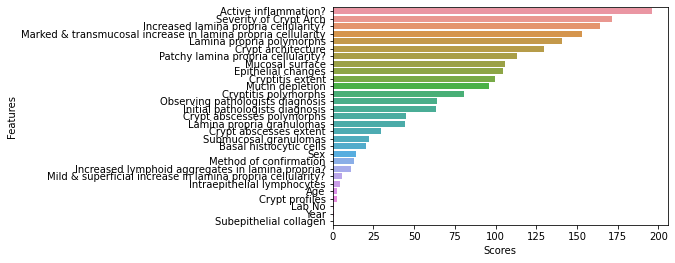

In [84]:
# plot the scores
ax = sns.barplot(x="Scores", y="Features", data=df_features)

In [85]:
# fit the model
# data = [X_sm, X_test_ord, y_sm, y_test_ord]
model = LogisticRegression(solver='lbfgs')
t = model.fit(X_sm, y_sm)
# evaluate the model
yhat = model.predict(X_test_ord)
# evaluate predictions
accuracy = accuracy_score(y_test_ord, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 67.98


/Users/prettyvo/anaconda3/envs/ML_I_MSDS/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [86]:
assigned = y_sm.unique()
assigned

array(['UC', 'CROHNS', 'NORMAL'], dtype=object)

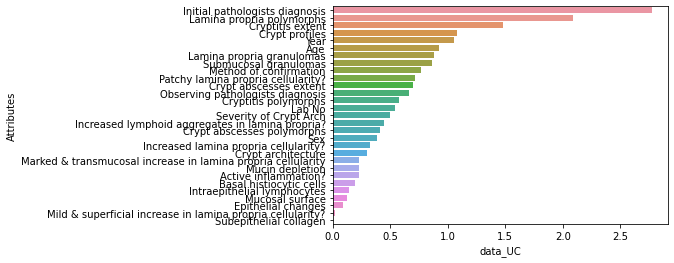

In [87]:
df_logit = pd.DataFrame()
df_logit['Attributes'] = X_sm.columns
for l in range(0, len(model.coef_)):
    df_logit['data_'+str(assigned[l])] = abs(model.coef_[l])
df_logit = df_logit.sort_values(by='data_UC', ascending = False)
# plot the scores
ax = sns.barplot(x="data_UC", y="Attributes", data=df_logit)

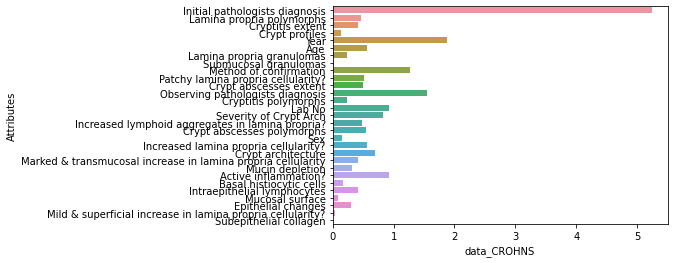

In [88]:
ax = sns.barplot(x="data_CROHNS", y="Attributes", data=df_logit)

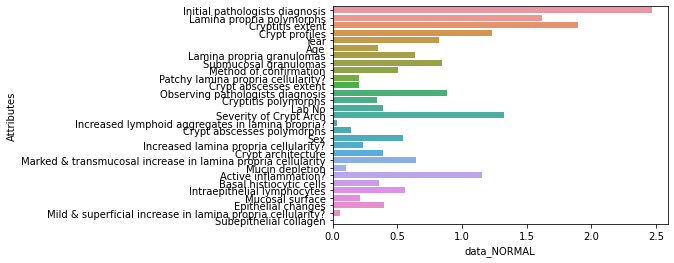

In [89]:
ax = sns.barplot(x="data_NORMAL", y="Attributes", data=df_logit)

### ETL PipeLine

confirmed to not be needed considering time constraint. 

## Machine Learning Models
---

### Parameter Tuning

### Creation of novel ML Models

### Running Models

## Results/Discussion
---

### Results

### Statistics

### Visualizations

### Discussion

### Conclusions